In [2]:
from PushshiftDumps.scripts.filter_file import process_file
from datetime import datetime
import nltk
from nltk.corpus import stopwords
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
single_field = None
write_bad_lines = True
hyperpop_terms = [
    # General Hyperpop Terms
    "hyperpop", "pc music", "100 gecs", "sophie", "ag cook",  
    "danny l harle", "ravenna golden", "dorian electra", "glitchcore",  
    "bubblegum bass", "nightcore", "electropop", "experimental pop"

    # Artists & Producers
    "sophie xeon", "sophie oil of every pearl", "danny harlecore",  
    "gfoty", "umru", "caro", "fraxiom", "gupi", "laura les", "dylan brady",  
    "osno1", "ericdoa", "aldn", "midwxst", "underscores", "twikipedia",  "dorian electra"
]

def filter_subreddit(input_file, output_file):
    output_format = "csv"
    from_date = datetime.strptime("2019-01-01", "%Y-%m-%d")
    to_date = datetime.strptime("2030-12-31", "%Y-%m-%d")
    field = "title"
    values = hyperpop_terms
    exact_match = False
    return process_file(input_file, output_file, output_format, field, values, from_date, to_date, single_field, exact_match)
    
def filter_comments(input_file, output_file):
    output_format = "csv"
    from_date = datetime.strptime("2012-01-01", "%Y-%m-%d")
    to_date = datetime.strptime("2030-12-31", "%Y-%m-%d")
    field = "body"
    values = hyperpop_terms
    exact_match = False
    return process_file(input_file, output_file, output_format, field, values, from_date, to_date, single_field, exact_match)

In [13]:
# Filter out r/charlixcx comments that contain the words related to hyperpop
input_file = "compressed_subreddits/charlixcx_comments.zst"
output_file = "decompressed_subreddits/hyperpop_filter/charlixcx_comments"

filter_comments(input_file, output_file)

2025-04-04 01:13:54,344 - INFO: Input: compressed_subreddits/charlixcx_comments.zst : Output: decompressed_subreddits/hyperpop_filter/charlixcx_comments.csv : Is submission False
2025-04-04 01:13:55,917 - INFO: 2024-06-14 17:27:56 : 100,000 : 2,251 : 0 : 18,481,575:48%
2025-04-04 01:13:57,219 - INFO: 2024-09-12 15:19:03 : 200,000 : 3,843 : 0 : 27,525,750:72%
2025-04-04 01:13:58,555 - INFO: 2024-12-10 15:05:22 : 300,000 : 5,294 : 0 : 38,310,027:100%
2025-04-04 01:13:58,692 - INFO: Complete : 312,021 : 5,455 : 0


In [ ]:
# Sentiment Analysis functions

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def load_data(filename):
    """Loads Reddit data from a CSV file."""
    df = pd.read_csv(filename, header=None, names=["post_id", "date", "username", "url", "text"])
    return df

def clean_text(text):
    """Cleans Reddit post text: removes URLs, special characters, and stopwords."""
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

def apply_cleaning(df):
    """Applies text cleaning to the dataframe."""
    df["clean_text"] = df["text"].apply(clean_text)
    return df

def analyze_sentiment_vader(text, analyzer):
    """Analyzes sentiment using VADER and returns the compound score."""
    scores = analyzer.polarity_scores(text)
    return scores["compound"]

def apply_sentiment_analysis(df):
    """Applies sentiment analysis to the dataframe."""
    analyzer = SentimentIntensityAnalyzer()
    df["sentiment_vader"] = df["clean_text"].apply(lambda x: analyze_sentiment_vader(x, analyzer))
    df["sentiment_label"] = df["sentiment_vader"].apply(lambda x: "positive" if x > 0.05 else "negative" if x < -0.05 else "neutral")
    return df

def save_results(df, output_filename):
    """Saves the processed dataframe to a CSV file."""
    df.to_csv(output_filename, index=False)
    print(f"Results saved to {output_filename}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yonbui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Perform sentiment analysis on r/asktransgender comments
filename = "decompressed_subreddits/hyperpop_filter/charlixcx_comments.csv" 
output_filename = "sentiments/hyperpop_filter/charlixcx_comments.csv"

df = load_data(filename)
df = apply_cleaning(df)
df = apply_sentiment_analysis(df)

save_results(df, output_filename)

df.head()

Results saved to sentiments/hyperpop_filter/charlixcx_comments.csv


,post_id,date,username,url,text,clean_text,sentiment_vader,sentiment_label
0,1,2015-02-15,u/chihuahuazero,https://www.reddit.com/r/charlixcx/comments/2w...,"While I first heard of PC Music awhile back, I...",first heard pc music awhile back checked today...,0.0000,neutral
1,1,2015-05-13,u/Mrweasel77,https://www.reddit.com/r/charlixcx/comments/35...,"I love True Romance, but Suckers not a bad alb...",love true romance suckers bad album good true ...,0.9612,positive
2,2,2016-02-26,u/chihuahuazero,https://www.reddit.com/r/charlixcx/comments/47...,I'm mixed with the dissonance too. Charli does...,im mixed dissonance charli lot startstopping e...,0.5267,positive
3,2,2016-06-21,u/mrkenny83,https://www.reddit.com/r/charlixcx/comments/4o...,"I'm assuming the same thing, but I'm holding o...",im assuming thing im holding onto hope hear ti...,0.4404,positive
4,1,2016-06-23,u/ninjas666,https://www.reddit.com/r/charlixcx/comments/4o...,I don't think SOPHIE helped produce this... I ...,dont think sophie helped produce wonder,0.0000,neutral


/var/folders/01/npnrqpkd1tn3d0zmllp5wtgw0000gn/T/ipykernel_19340/3445225064.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment_label", palette="coolwarm", order=["positive", "neutral", "negative"]),


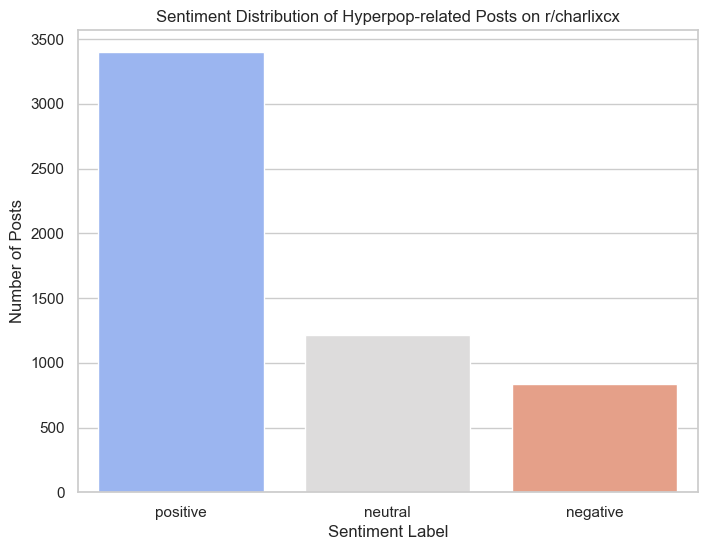

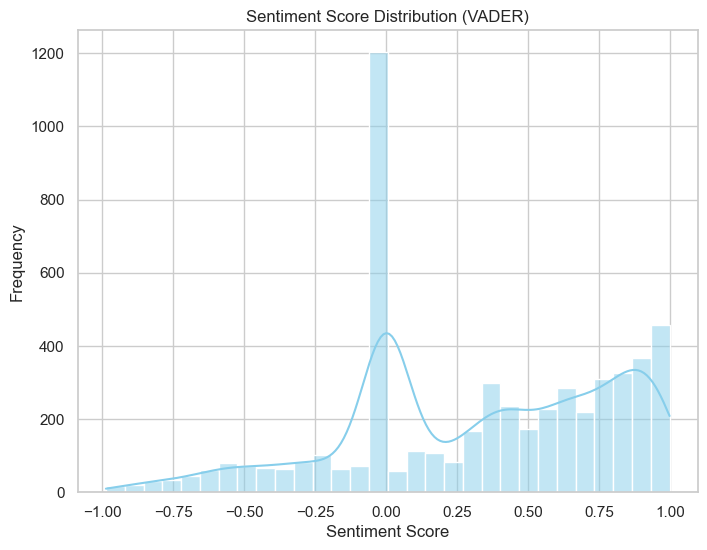

/var/folders/01/npnrqpkd1tn3d0zmllp5wtgw0000gn/T/ipykernel_19340/3445225064.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sentiment_label", y="sentiment_vader", data=df, palette="coolwarm")


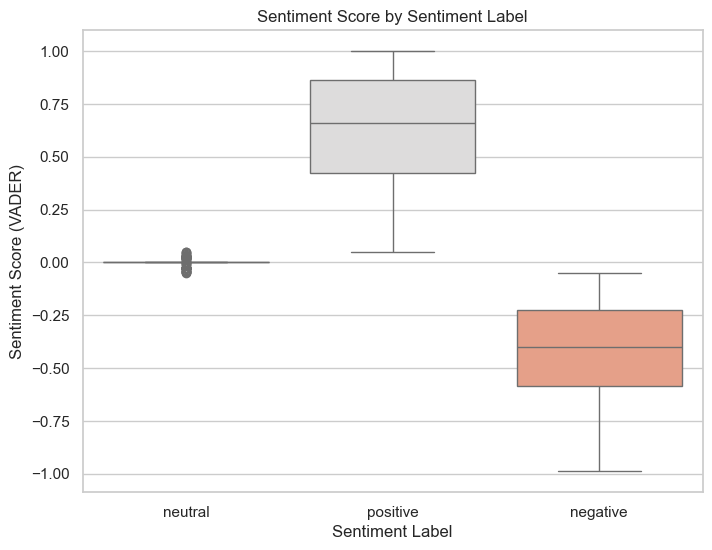

<Figure size 1200x600 with 0 Axes>

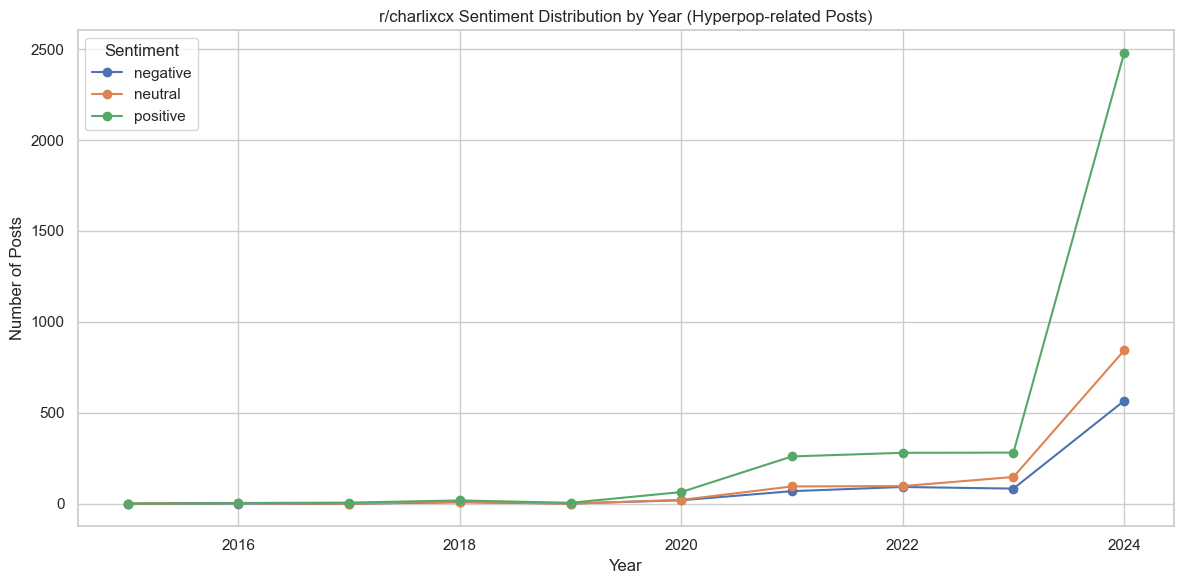

In [17]:
# Load the processed DataFrame with sentiment analysis results
filename = "sentiments/hyperpop_filter/charlixcx_comments.csv"
df = pd.read_csv(filename)

# Set up the visual style for Seaborn
sns.set(style="whitegrid")

# Create a count plot for sentiment labels (positive, neutral, negative)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="sentiment_label", palette="coolwarm", order=["positive", "neutral", "negative"]), 
plt.title("Sentiment Distribution of Hyperpop-related Posts on r/charlixcx")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Posts")
plt.show()

# Create a distribution plot for sentiment_vader score
plt.figure(figsize=(8, 6))
sns.histplot(df["sentiment_vader"], bins=30, kde=True, color="skyblue")
plt.title("Sentiment Score Distribution (VADER)")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# Boxplot to show sentiment_vader score distribution by sentiment label
plt.figure(figsize=(8, 6))
sns.boxplot(x="sentiment_label", y="sentiment_vader", data=df, palette="coolwarm")
plt.title("Sentiment Score by Sentiment Label")
plt.xlabel("Sentiment Label")
plt.ylabel("Sentiment Score (VADER)")
plt.show()

# Plot sentiment distribution by year as a line graph.

# Ensure date is datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Drop rows with invalid dates
df = df.dropna(subset=["date"])

# Extract year
df["year"] = df["date"].dt.year

# Count sentiment per year
sentiment_counts = df.groupby(["year", "sentiment_label"]).size().reset_index(name="count")

# Pivot for line plot
sentiment_pivot = sentiment_counts.pivot_table(index="year", columns="sentiment_label", values="count", aggfunc="sum").fillna(0)

# Plot
plt.figure(figsize=(12, 6))
sentiment_pivot.plot(kind="line", marker="o", linestyle='-', figsize=(12, 6))
plt.title("r/charlixcx Sentiment Distribution by Year (Hyperpop-related Posts)")
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

In [ ]:
# Decompress r/charlixcx comments with no filters
input_file = "compressed_subreddits/charlixcx_comments.zst"
output_file = "decompressed_subreddits/charlixcx_comments"
output_format = "csv"
from_date = datetime.strptime("2018-01-01", "%Y-%m-%d")
to_date = datetime.strptime("2030-12-31", "%Y-%m-%d")
single_field = None
field = None
values = ['']
exact_match = False  
process_file(input_file, output_file, output_format, field, values, from_date, to_date, single_field, exact_match)

2025-04-04 02:26:34,665 - INFO: Input: compressed_subreddits/charlixcx_comments.zst : Output: decompressed_subreddits/charlixcx_comments.csv : Is submission False
2025-04-04 02:26:36,499 - INFO: 2024-06-14 17:27:56 : 100,000 : 99,343 : 0 : 18,481,575:48%
2025-04-04 02:26:38,016 - INFO: 2024-09-12 15:19:03 : 200,000 : 199,343 : 0 : 27,525,750:72%
2025-04-04 02:26:39,662 - INFO: 2024-12-10 15:05:22 : 300,000 : 299,343 : 0 : 38,310,027:100%
2025-04-04 02:26:39,868 - INFO: Complete : 312,021 : 311,365 : 0


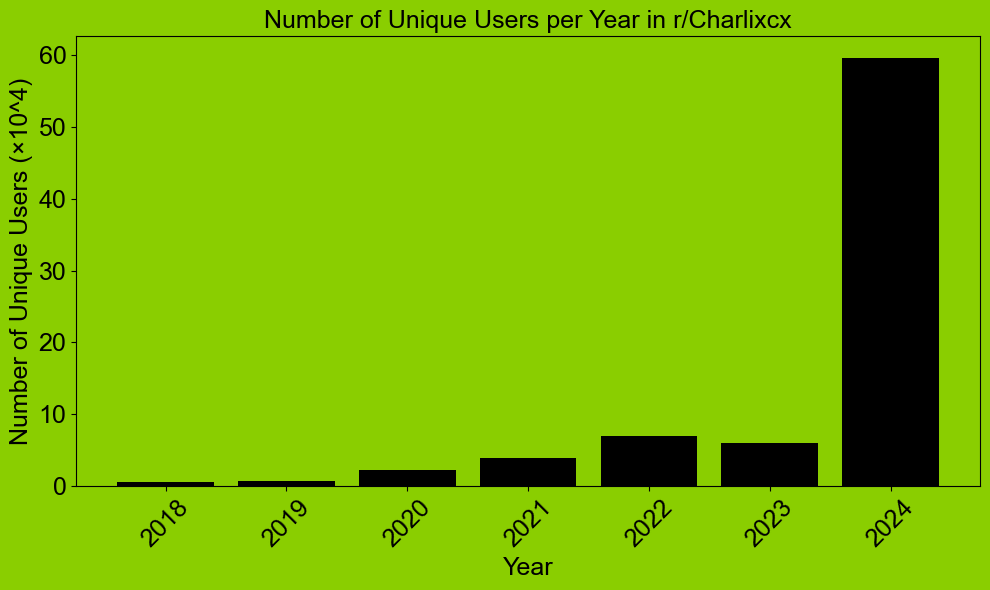

In [10]:
# Group by year and collect unique usernames
df = pd.read_csv("decompressed_subreddits/charlixcx_comments.csv", header=None, names=["post_id", "date", "username", "url", "text"])

# Ensure the 'date' column is datetime and extract the year
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["year"] = df["date"].dt.year

# Group by year and collect unique usernames (as a set)
users_by_year = df.groupby("year")["username"].unique().reset_index()

# Convert the list of usernames to a comma-separated string
users_by_year["username"] = users_by_year["username"].apply(lambda x: ",".join(x))

# Save the results to a new CSV
users_by_year.to_csv("charlixcx_users_by_year.csv", index=False)

# Count the number of unique users per year
users_by_year["user_count"] = users_by_year["username"].apply(len)

# Plot the bar graph

# Set Arial font
plt.rcParams['font.family'] = 'Arial'

# Create the figure with a green background
plt.figure(figsize=(10, 6), facecolor='#8ace00')  # Set the figure's background color to green

# Create the plot (bar chart)
ax = plt.gca()  # Get the current axes
ax.set_facecolor('#8ace00')  # Set the background color inside the plot (axes) to green

# Scale the user count for y-axis display
users_by_year["user_count_scaled"] = users_by_year["user_count"] / 10000

# Plot the bar chart with black bars
plt.bar(users_by_year["year"], users_by_year["user_count_scaled"], color="black")

# Set labels and title with white text for visibility
plt.xlabel('Year', color='black', fontsize=18)  # Label for the x-axis with white text
plt.ylabel('Number of Unique Users (×10^4)', color='black', fontsize=18)  # Label for the y-axis with white text
plt.title('Number of Unique Users per Year in r/Charlixcx', color='black', fontsize=18)  # Title for the chart with white text

# Rotate the x-axis labels for better readability
plt.tick_params(axis='both', labelsize=18)  # Adjust tick label font size
plt.xticks(rotation=45, color='black')  # Rotate and make x-axis labels white
plt.yticks(color='black')  # Make y-axis labels black

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()